<a href="https://colab.research.google.com/github/AlgorithmBurv/Pengolahan-Citra/blob/main/PC_sesi4%5B2%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

figsize = (10, 10)


First, read the image as grayscale



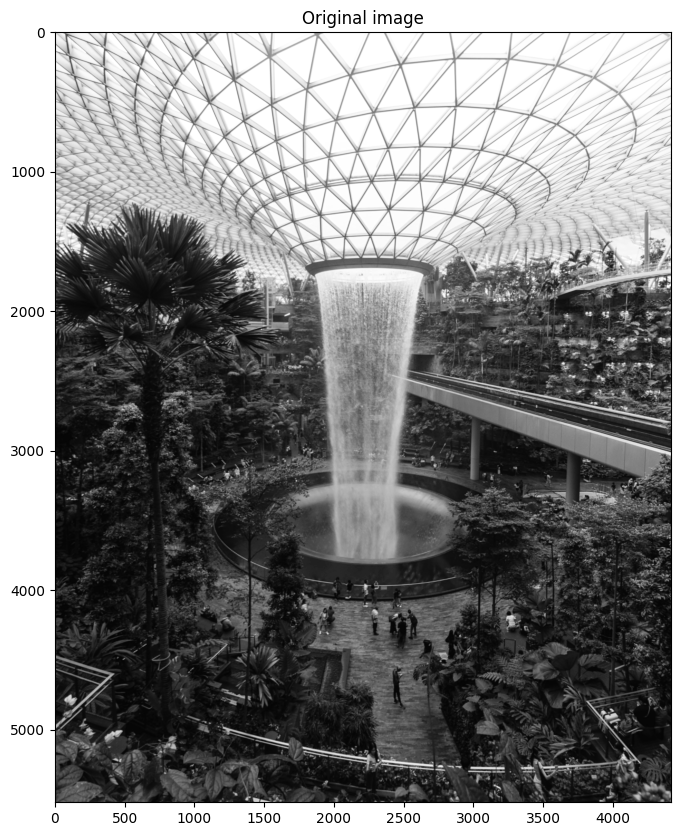

In [ ]:
# read as grayscale
I = cv2.imread("/content/foto.jpg", 0)

plt.figure(figsize=figsize)
plt.imshow(I, cmap="gray", vmin=0, vmax=255)
plt.title("Original image")
plt.show()


Let's start by calculating and showing the original histogram


In [ ]:
bins_edges_min_max = [0, 256]
num_bins = 256
bin_count, bins_edges = np.histogram(I, num_bins, bins_edges_min_max)
bins_start = bins_edges[:-1]


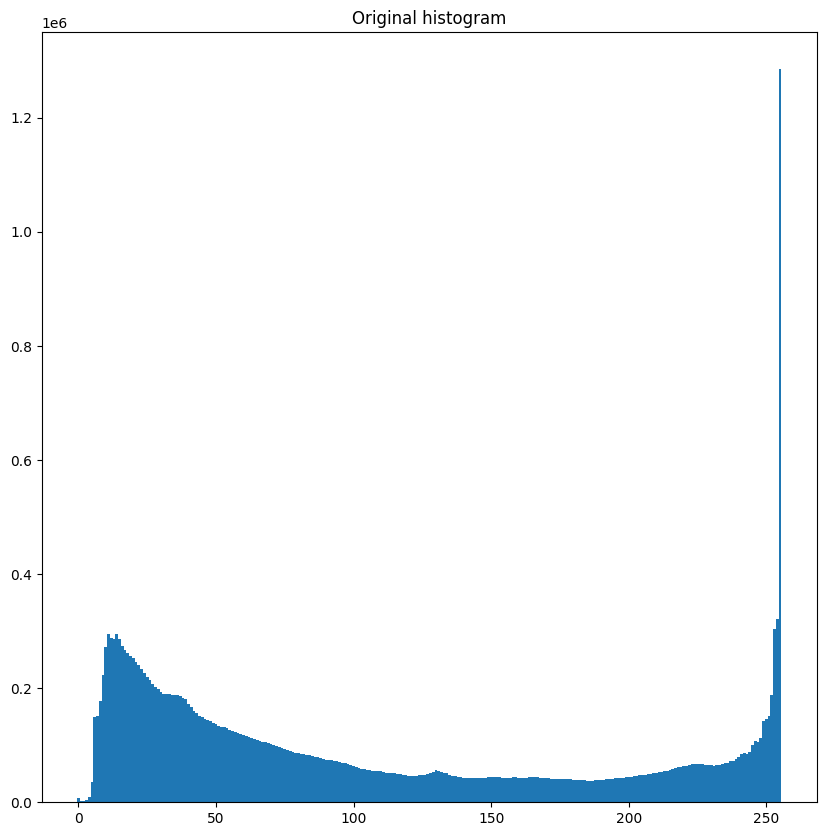

In [ ]:
def draw_hist(x_axis, input):
    fig, ax = plt.subplots(figsize=figsize)
    # why not using plt.hist? because we want to plot also some derivations of this hist, so this is easier
    plt.bar(x_axis, input, width=input.shape[0] / (x_axis[-1] - x_axis[0] + 1))
    return fig, ax


draw_hist(bins_start, bin_count)
plt.title("Original histogram")
plt.show()



Normalize the histogram to gat a discrete PDF


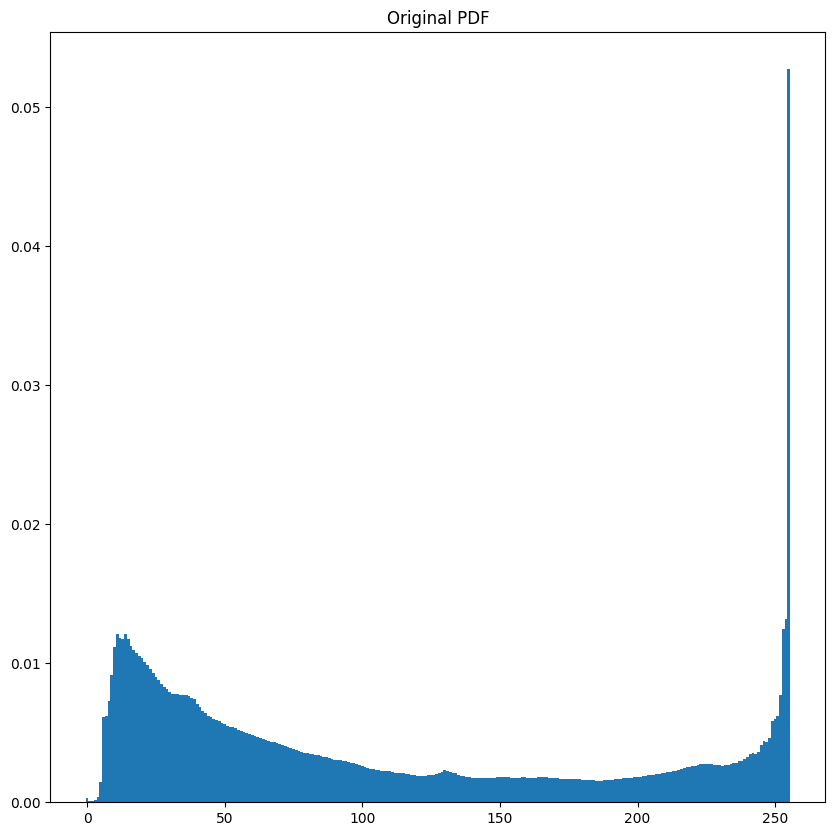

In [ ]:
pdf = bin_count / np.sum(bin_count)

draw_hist(bins_start, pdf)
plt.title("Original PDF")
plt.show()



Get the CDF by calculating the cumulative sum of the pdf data


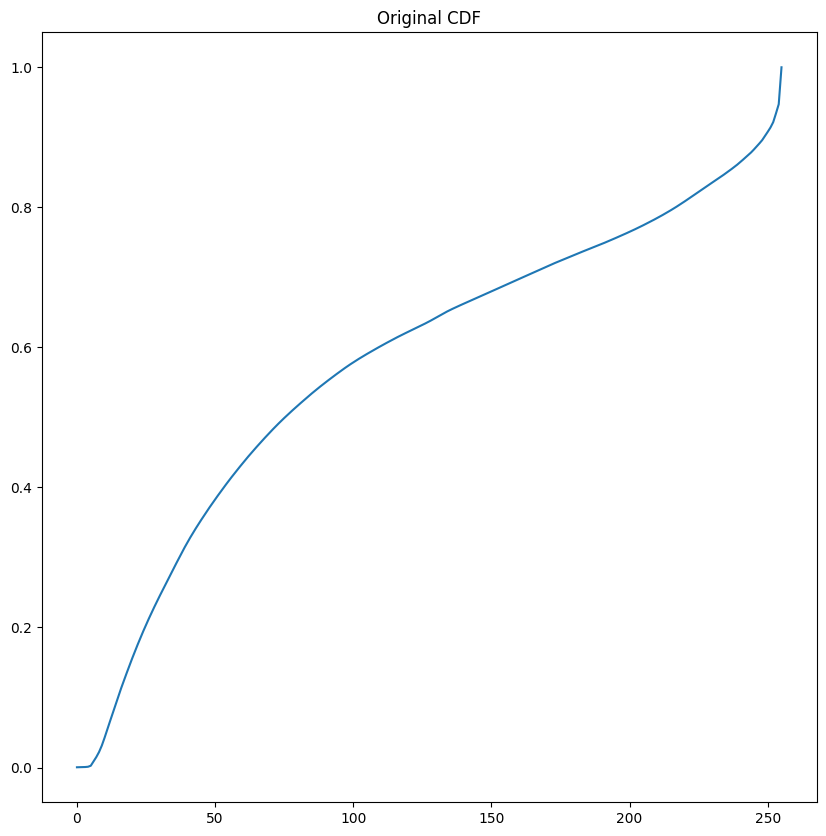

In [ ]:
cdf = np.cumsum(pdf)

plt.figure(figsize=figsize)
plt.plot(cdf)
plt.title("Original CDF")
plt.show()



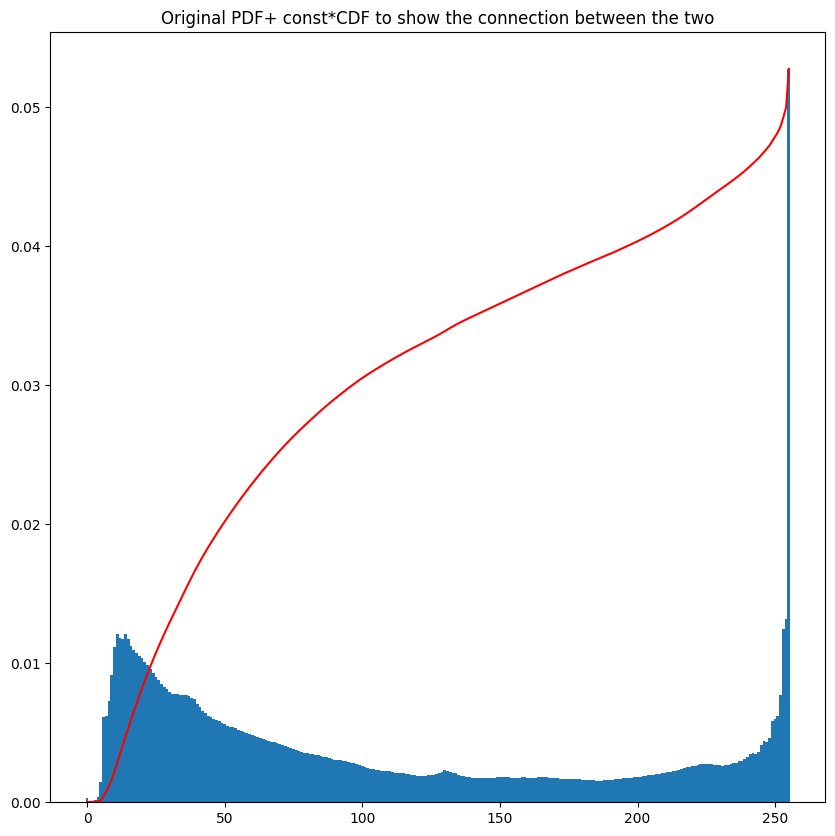

In [ ]:
fig, ax = draw_hist(bins_start, pdf)
ax.plot(cdf * np.max(pdf), "r")
plt.title("Original PDF+ const*CDF to show the connection between the two")
plt.show()



The final step is to un-normalize the CDF to become the equalization function


In [ ]:
f_eq = np.round(cdf * 255).astype(int)

f_eq


array([  0,   0,   0,   0,   0,   1,   2,   4,   6,   8,  11,  14,  17,
        20,  23,  26,  29,  32,  34,  37,  40,  42,  45,  47,  50,  52,
        54,  56,  58,  61,  63,  65,  67,  69,  71,  72,  74,  76,  78,
        80,  82,  84,  85,  87,  89,  90,  92,  93,  95,  96,  98,  99,
       100, 102, 103, 104, 106, 107, 108, 110, 111, 112, 113, 114, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 134, 135, 136, 137, 138, 139, 139, 140,
       141, 142, 143, 143, 144, 145, 145, 146, 147, 148, 148, 149, 149,
       150, 151, 151, 152, 152, 153, 153, 154, 155, 155, 156, 156, 157,
       157, 158, 158, 159, 159, 160, 160, 161, 161, 162, 162, 163, 163,
       164, 164, 165, 166, 166, 167, 167, 168, 168, 168, 169, 169, 170,
       170, 171, 171, 172, 172, 172, 173, 173, 174, 174, 175, 175, 176,
       176, 177, 177, 177, 178, 178, 179, 179, 180, 180, 181, 181, 182,
       182, 182, 183, 183, 184, 184, 185, 185, 185, 186, 186, 18

Use the equalization function to get the equalized image


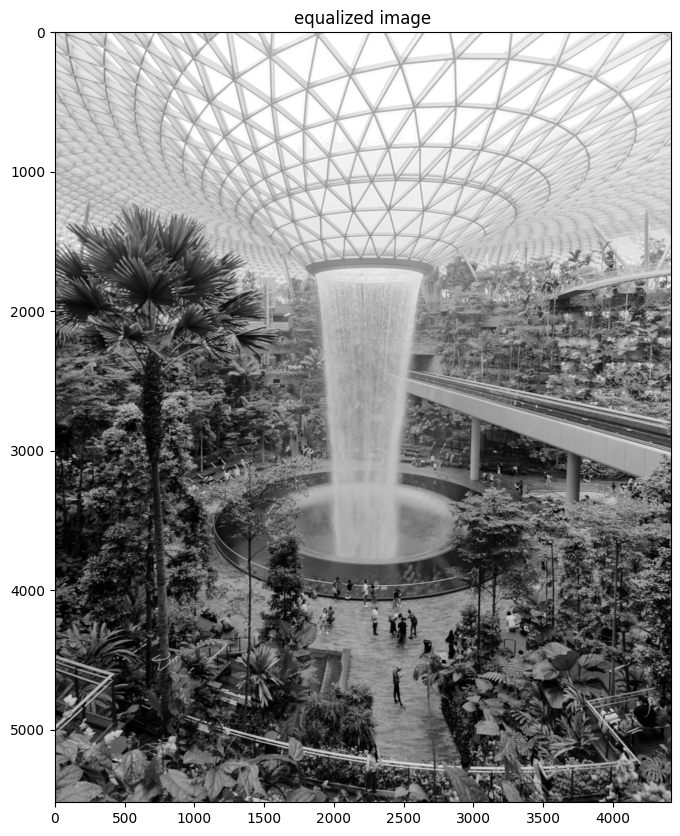

In [ ]:
I_eq = f_eq[I]

plt.figure(figsize=figsize)
plt.imshow(I_eq, cmap="gray", vmin=0, vmax=255)
plt.title("equalized image")
plt.show()



Plot the equalized histogram, PDF and CDF


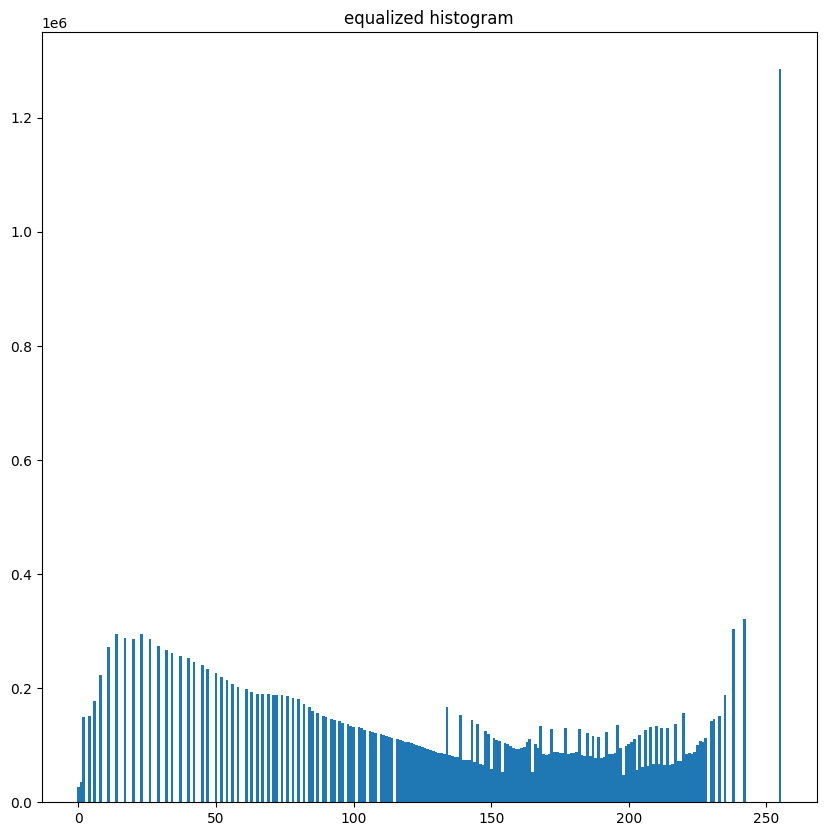

In [ ]:
bin_count, bins_edges = np.histogram(I_eq, num_bins, bins_edges_min_max)
bins_start = bins_edges[:-1]

draw_hist(bins_start, bin_count)
plt.title("equalized histogram")
plt.show()



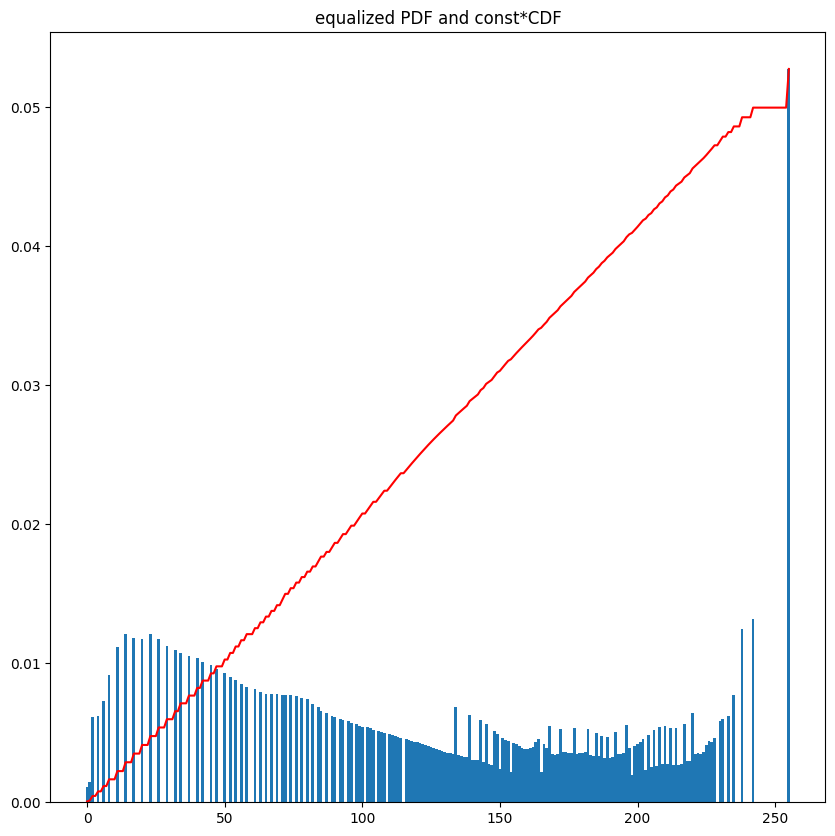

In [ ]:
pdf = bin_count / np.sum(bin_count)
cdf = np.cumsum(pdf)

fig, ax = draw_hist(bins_start, pdf)
ax.plot(cdf * np.max(pdf), "r")
plt.title("equalized PDF and const*CDF")
plt.show()



## cv2 histogram equalization function


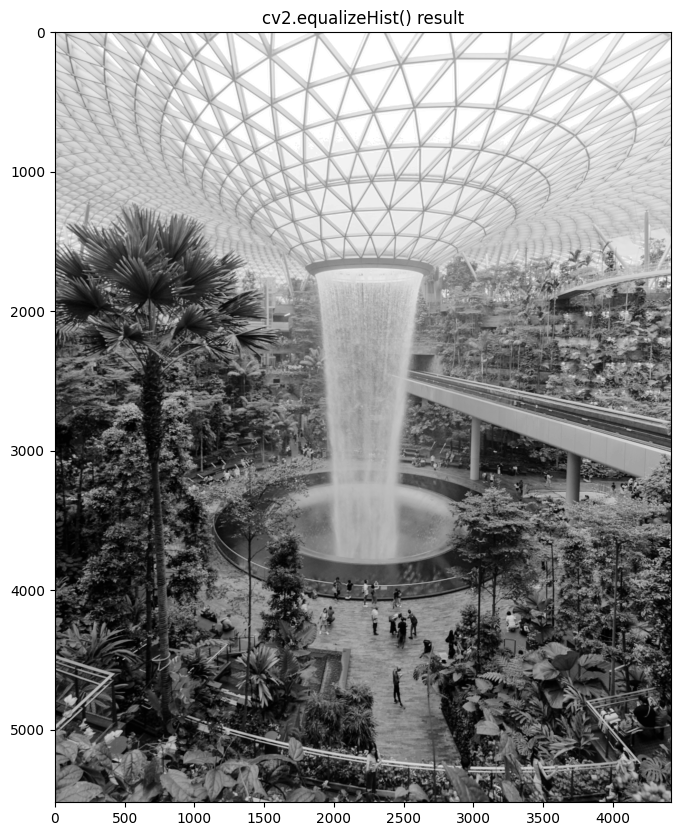

In [ ]:
I_eq_cv2 = cv2.equalizeHist(I)

plt.figure(figsize=figsize)
plt.imshow(I_eq_cv2, cmap="gray", vmin=0, vmax=255)
plt.title("cv2.equalizeHist() result")
plt.show()

